In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

In [2]:
import os 

In [3]:
housing=pd.read_csv('housing.csv')

In [4]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


# data exploration

In [5]:
housing.shape

(20640, 10)

In [6]:
housing.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [7]:
class checkna():
    def __init__(self,housing):
        #self.housing=housing
        for cols in housing.columns:
            if housing[cols].isna==True:
                print(cols)
            else:
                print('no na')

In [8]:
checkna(housing)

no na
no na
no na
no na
no na
no na
no na
no na
no na
no na


In [9]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [10]:
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>],
       [<AxesSubplot:title={'center':'total_rooms'}>,
        <AxesSubplot:title={'center':'total_bedrooms'}>,
        <AxesSubplot:title={'center':'population'}>],
       [<AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>,
        <AxesSubplot:title={'center':'median_house_value'}>]],
      dtype=object)

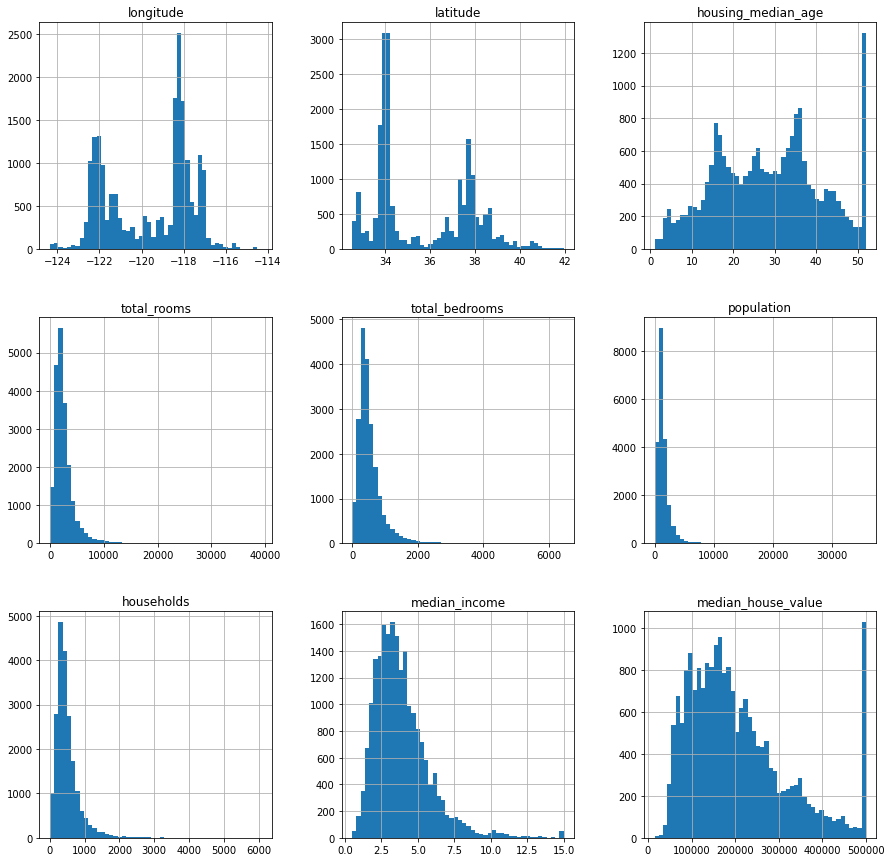

In [11]:
housing.hist(bins=50,figsize=[15,15])

<AxesSubplot:>

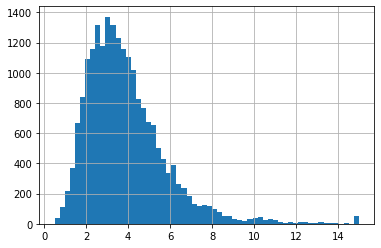

In [12]:
housing['median_income'].hist(bins=60)

In [13]:
housing['income_cat']=pd.cut(housing['median_income'],bins=[0,1.5,3.0,4.5,6,np.inf],labels=[1,2,3,4,5])

<AxesSubplot:>

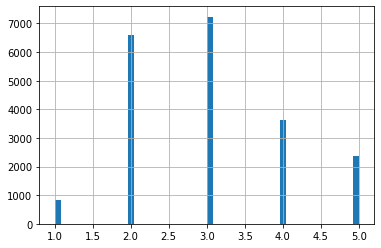

In [14]:
housing['income_cat'].hist(bins=50)

In [15]:
housing.shape

(20640, 11)

In [16]:
(housing['income_cat'].value_counts()/len(housing)).sort_values(ascending=False)

3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: income_cat, dtype: float64

In [17]:
from sklearn.model_selection import train_test_split
train_set,test_set=train_test_split(housing,train_size=.8)
(train_set['income_cat'].value_counts()/len(train_set)).sort_values(ascending=False)

3    0.348534
2    0.315468
4    0.179566
5    0.116703
1    0.039729
Name: income_cat, dtype: float64

In [18]:
from sklearn.model_selection import train_test_split
strain_set,stest_set=train_test_split(housing,train_size=.8,stratify=housing['income_cat'])
(strain_set['income_cat'].value_counts()/len(strain_set)).sort_values(ascending=False)

3    0.350594
2    0.318859
4    0.176296
5    0.114462
1    0.039789
Name: income_cat, dtype: float64

In [19]:
strain_set.drop('income_cat',axis=1,inplace=True)
stest_set.drop('income_cat',axis=1,inplace=True)

In [20]:
strain_set.shape

(16512, 10)

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

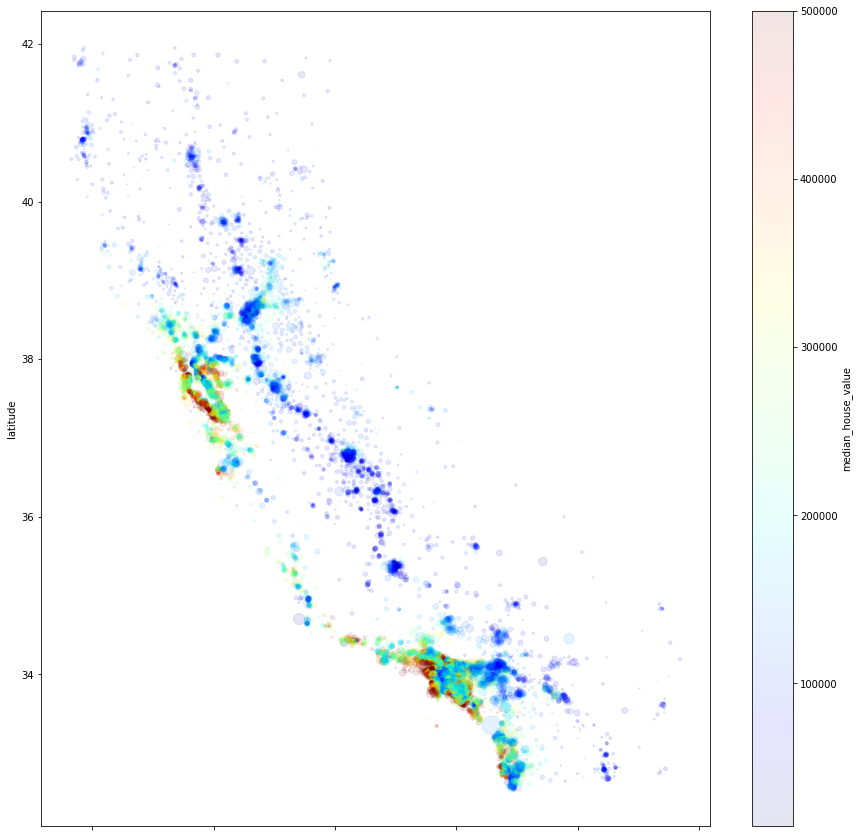

In [21]:
housing.plot(kind='scatter',x='longitude',y='latitude',figsize=[15,15],
             alpha=.1,
             s=housing['population']/100,
             c='median_house_value',
             cmap=plt.get_cmap('jet'),
             colorbar=True)

In [22]:
corr_matrix=housing.corr()

In [23]:
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

In [24]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,5
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,5
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,5
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,4
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,3


In [25]:
test=strain_set.drop('ocean_proximity',axis=1)
tt=strain_set['ocean_proximity']

In [26]:
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.impute import SimpleImputer


In [27]:
from sklearn.base import BaseEstimator,TransformerMixin
from sklearn.preprocessing import FunctionTransformer

In [29]:
from sklearn.pipeline import Pipeline
num_pipeline = Pipeline([
            ('imputer', SimpleImputer(strategy="median")),
            ('std_scaler', StandardScaler()),
        ])

In [30]:
cat_pipline=Pipeline(["cat", OneHotEncoder(), cat_attribs])

NameError: name 'cat_attribs' is not defined

In [ ]:
dd=cat_pipline.fit_transform(test)

In [ ]:
data=num_pipeline.fit_transform(test)

In [ ]:
df=pd.DataFrame(data,columns=test.columns)

In [ ]:
df1=pd.DataFrame(dd.toarray(),columns=cat_pipline.get_feature_names_out())

In [31]:
df1

NameError: name 'df1' is not defined

In [32]:
strain=strain_set.drop('median_house_value',axis=1)
strain_label=strain_set['median_house_value']
stest=stest_set.drop('median_house_value',axis=1)
stest_label=stest_set['median_house_value']
strain_num=strain.drop('ocean_proximity',axis=1)
stest_num=stest.drop('ocean_proximity',axis=1)

In [33]:
from sklearn.compose import ColumnTransformer
num_attribs = list(strain_num)
cat_attribs = ["ocean_proximity"]
full_pipeline = ColumnTransformer([
             ("num", num_pipeline, num_attribs),
             ("cat", OneHotEncoder(), cat_attribs),
         ])
housing_prepared = full_pipeline.fit_transform(strain)

In [34]:
housing_prepared

array([[ 0.78620051, -0.89760336, -0.92076881, ...,  0.        ,
         0.        ,  0.        ],
       [-0.93849231,  1.35854973,  0.66337433, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.64122633, -0.75717889,  1.53465306, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.78620051, -0.82739112, -0.68314734, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.25629489, -0.0971839 ,  0.50496002, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.87618448, -0.85547602, -0.28711155, ...,  0.        ,
         0.        ,  0.        ]])

In [35]:
from sklearn.linear_model import LinearRegression

reg=LinearRegression()
reg.fit(housing_prepared,strain_label)

LinearRegression()

In [36]:
some_data = stest.iloc[:5]
some_labels = stest_label.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)

In [37]:
print("Predictions:", reg.predict(some_data_prepared))

Predictions: [202368. 120384.  67584. 149632. 170240.]


In [38]:
print("Labels:",list(some_labels))

Labels: [176300.0, 147500.0, 89400.0, 151900.0, 93600.0]


In [39]:
from sklearn.metrics import mean_squared_error
housing_predictions = reg.predict(housing_prepared)
lin_mse = mean_squared_error(strain_label, housing_predictions) 
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68327.52436069335

In [40]:
from sklearn.tree import DecisionTreeRegressor 
tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, strain_label)

DecisionTreeRegressor()

In [41]:
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(strain_label, housing_predictions) 
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

In [42]:
from sklearn.model_selection import cross_val_score
cvs=cross_val_score(tree_reg,housing_prepared,strain_label,scoring='neg_mean_squared_error',cv=10)
tree_rmse_scores = np.sqrt(-cvs)

In [43]:

def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

In [44]:
display_scores(tree_rmse_scores)

Scores: [69099.60382451 70594.51177343 65434.25090917 69866.25097191
 69879.71580574 67367.18864575 69578.23911346 67323.71564572
 66372.46505919 72000.97697818]
Mean: 68751.69187270544
Standard deviation: 1946.6597544694844


In [45]:
cvs=cross_val_score(reg,housing_prepared,strain_label,scoring='neg_mean_squared_error',cv=10)
lin_rmse_scores = np.sqrt(-cvs)

In [46]:
display_scores(lin_rmse_scores)

Scores: [71227.60346558 67617.02856309 67557.45919726 66474.55300268
 69612.9068735  70552.83506289 66615.19315077 64978.9208967
 69417.01154227 69567.48172264]
Mean: 68362.09934773899
Standard deviation: 1907.976096304742
